# Визуализация данных




In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
PATH = 'names/'

In [150]:
def read_to_dataframe(years):
    res_df = pd.DataFrame()
    
    # записываем всё в один датафрэйм
    for year in years:
        filepath = PATH + 'yob' + str(year) + '.txt'
        df = pd.read_csv(filepath, names=['Name','Gender','Count', 'Year'])
        df['Year'] = year
        res_df = res_df.append(df)
    return res_df

#### 1) Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [151]:
years = list(range(1900, 2000))

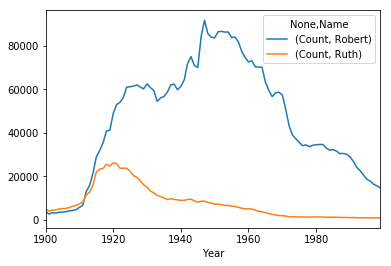

In [152]:
def create_pivot_table_by_names(dataframe, names, index, columns, aggfunc):
    res = dataframe[dataframe['Name'].isin(names)]
    return(res.pivot_table(index, columns, aggfunc=aggfunc))

res_pivot = create_pivot_table_by_names(df, names=['Robert', 'Ruth'], index=['Count'], columns=['Name', 'Year'], aggfunc='sum')

df = read_to_dataframe(years)
res_pivot.unstack('Name').plot()

#### 2) Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

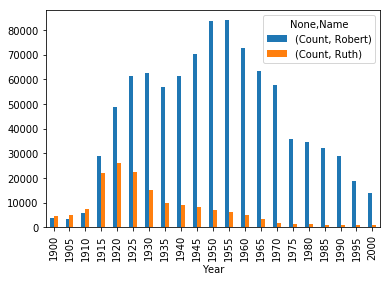

In [153]:
years = list(range(1900, 2001, 5))
df = read_to_dataframe(years)
res_pivot = create_pivot_table_by_names(df, names=['Robert', 'Ruth'], index=['Count'], columns=['Name', 'Year'], aggfunc='sum')
res_pivot.unstack('Name').plot.bar()

#### 3) Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

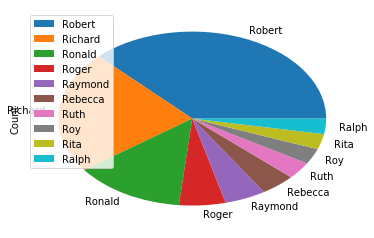

In [154]:
years = [1950]
df = read_to_dataframe(years)
#выбираем только имена на R; сортируем по частоте употребления; выбираем 10 и строим диаграму

df[df["Name"].map(lambda x: x.startswith('R'))].groupby('Name').sum().sort_values(by="Count", ascending=False).head(10).plot.pie("Count")

4) Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

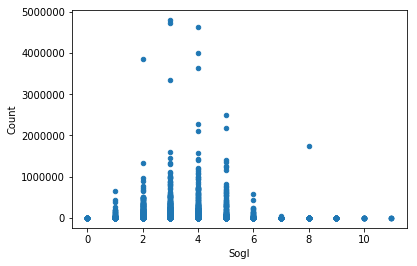

In [155]:
years = list(range(1900, 2000))
df = read_to_dataframe(years)
#сложить всю статистику с 1900 до 2000, сгруппировать по именам
names = df.pivot_table(['Count'], ['Name'], aggfunc='sum')
# посчитать количество согласных букв в каждом имени 
names.reset_index(inplace=True)
names['Sogl'] = names.apply(lambda row: sum(letter not in set("aeiouy") for letter in str(row.Name).lower()), axis=1)
names
#вывести на график отношение "Количество согласных букв в имени"  : "Количество употреблений".
names.plot.scatter(x='Sogl', y='Count')